In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris= datasets.load_iris()
x = iris.data[:,(2,3)]
y= iris.target

In [3]:
sentosa_or_versicolor= (y==0) | (y==1)  # Sentosa vs Versicolor
X=x[sentosa_or_versicolor]
y=y[sentosa_or_versicolor]

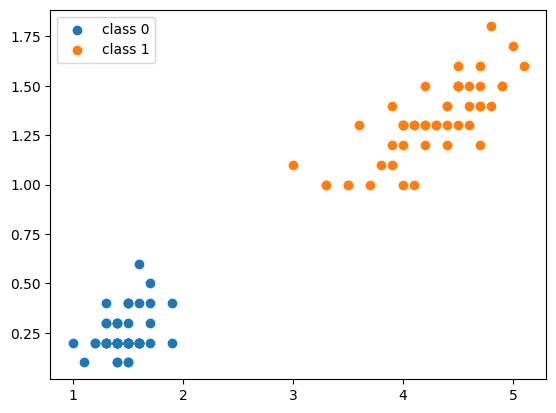

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], label="class 0")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], label="class 1")
plt.legend()
plt.show()

In [5]:
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

,C,inf
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
svm_clf.coef_ #Weight term

array([[1.29411744, 0.82352928]])

In [7]:
svm_clf.intercept_ #bias term

array([-3.78823471])

In [8]:
from cProfile import label


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA',label="Support Vectors")  # Highlight Support Vectors
    plt.plot(x0, decision_boundary, "k-",linewidth=2,label="Hyperplane")
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


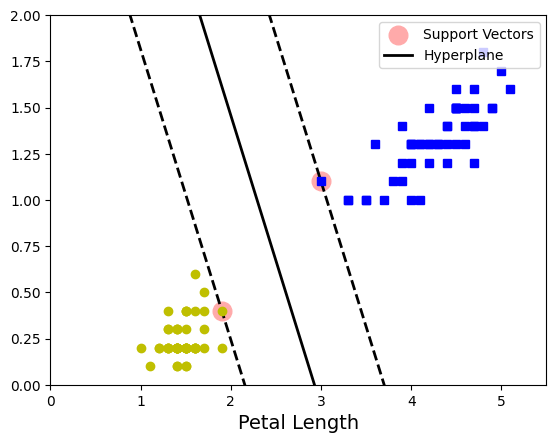

In [9]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],"bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel('Petal Length',fontsize=14)
plt.axis([0,5.5,0,2])
plt.legend()
plt.show()


In [10]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

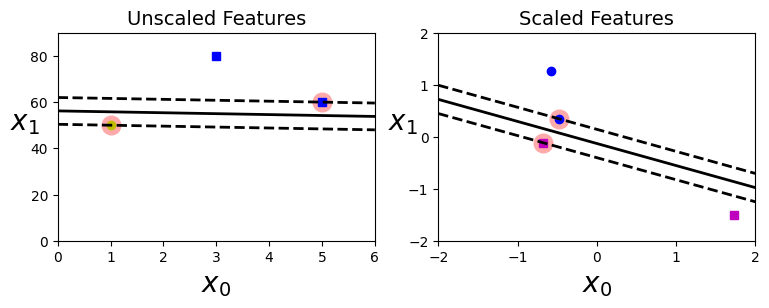

In [13]:
# Why Scaling is Important?
Xs = np.array([[1, 50], [50,20], [3,80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1],"bs")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "yo")
plot_svc_decision_boundary(svm_clf,0 , 6)
plt.xlabel('$x_0$',fontsize=20)
plt.ylabel('$x_1$',fontsize=20,rotation=0)
plt.title("Unscaled Features", fontsize=14)
plt.axis([0,6,0,90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1],"bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel('$x_0$',fontsize=20)
plt.ylabel('$x_1$',fontsize=20,rotation=0)
plt.title("Scaled Features", fontsize=14)
plt.axis([-2,2,-2,2])


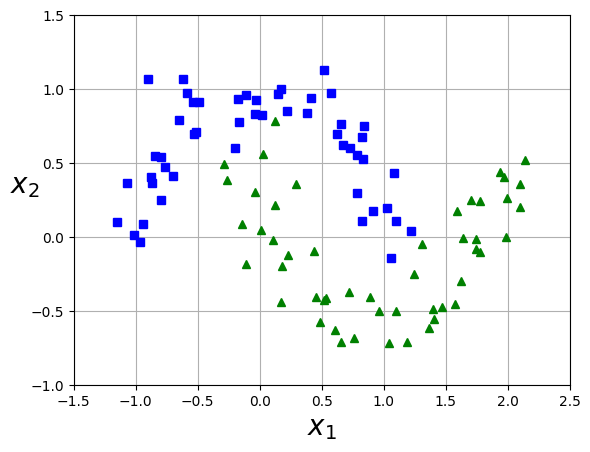

In [14]:
#Non-Linear Classification with SVM
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_dataset(X, y,axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
    

In [20]:
#Introduction to Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.svm import LinearSVC  
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10,loss='hinge', random_state=42))
])
polynomial_svm_clf.fit(X, y)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


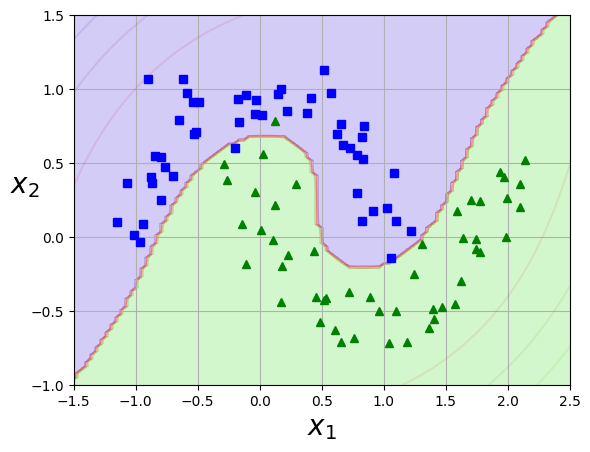

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contour(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Example usage:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()
